In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd  drive/MyDrive/Colab Notebooks/artifical_assignment/Deepfake Asnmnt/

/content/drive/MyDrive/Colab Notebooks/artifical_assignment/Deepfake Asnmnt


In [3]:
!pip install timm
import timm 
#timm.list_models(pretrained=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.7 MB/s eta 0:00:00


In [4]:
import torchvision.datasets as dsets
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from PIL import Image
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [5]:
class CustomDataset(Dataset):
    def __init__(self, folder_path, file_names, transform=None):
        self.folder_path = folder_path
        self.file_names = file_names
        self.transform = transform
        
    def __getitem__(self, index):
        file_name = self.file_names[index]
        class_name = file_name.split('_')[0]
        if class_name == 'fake':
          class_name = 0
        else:
          class_name = 1
          
        image_path = os.path.join(self.folder_path, file_name)       
        image = Image.open(image_path)
        
        if self.transform is not None:
            image = self.transform(image)
        
        return image, class_name
    
    def __len__(self):
        return len(self.file_names)

In [6]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [7]:
folder_path = 'High Quality/f2f_data/train'
file_names = os.listdir(folder_path)
HQ_F2F_train = CustomDataset(folder_path, file_names, transform=transform)
HQ_F2F_train_loader = torch.utils.data.DataLoader(dataset=HQ_F2F_train, batch_size=64, shuffle=True, drop_last=True)

folder_path = 'High Quality/f2f_data/val'
file_names = os.listdir(folder_path)
HQ_F2F_val = CustomDataset(folder_path, file_names, transform=transform)
HQ_F2F_val_loader = torch.utils.data.DataLoader(dataset=HQ_F2F_val, batch_size=64, shuffle=True, drop_last=True)

folder_path = 'High Quality/f2f_data/test'
file_names = os.listdir(folder_path)
HQ_F2F_test = CustomDataset(folder_path, file_names, transform=transform)
HQ_F2F_test_loader = torch.utils.data.DataLoader(dataset=HQ_F2F_test, batch_size=64, shuffle=True, drop_last=True)

In [8]:
folder_path = 'High Quality/nt_data/train'
file_names = os.listdir(folder_path)
HQ_NT_train = CustomDataset(folder_path, file_names, transform=transform)
HQ_NT_train_loader = torch.utils.data.DataLoader(dataset=HQ_NT_train, batch_size=64, shuffle=True, drop_last=True)

folder_path = 'High Quality/nt_data/val'
file_names = os.listdir(folder_path)
HQ_NT_val = CustomDataset(folder_path, file_names, transform=transform)
HQ_NT_val_loader = torch.utils.data.DataLoader(dataset=HQ_NT_val, batch_size=64, shuffle=True, drop_last=True)

folder_path = 'High Quality/nt_data/test'
file_names = os.listdir(folder_path)
HQ_NT_test = CustomDataset(folder_path, file_names, transform=transform)
HQ_NT_test_loader = torch.utils.data.DataLoader(dataset=HQ_NT_test, batch_size=64, shuffle=True, drop_last=True)

In [9]:
folder_path = 'Low Quality/f2f_data/train'
file_names = os.listdir(folder_path)
LQ_F2F_train = CustomDataset(folder_path, file_names, transform=transform)
LQ_F2F_train_loader = torch.utils.data.DataLoader(dataset=LQ_F2F_train, batch_size=64, shuffle=True, drop_last=True)

folder_path = 'Low Quality/f2f_data/val'
file_names = os.listdir(folder_path)
LQ_F2F_val = CustomDataset(folder_path, file_names, transform=transform)
LQ_F2F_val_loader = torch.utils.data.DataLoader(dataset=LQ_F2F_val, batch_size=64, shuffle=True, drop_last=True)

folder_path = 'Low Quality/f2f_data/test'
file_names = os.listdir(folder_path)
LQ_F2F_test = CustomDataset(folder_path, file_names, transform=transform)
LQ_F2F_test_loader = torch.utils.data.DataLoader(dataset=LQ_F2F_test, batch_size=64, shuffle=True, drop_last=True)

In [10]:
folder_path = 'Low Quality/nt_data/train'
file_names = os.listdir(folder_path)
LQ_NT_train = CustomDataset(folder_path, file_names, transform=transform)
LQ_NT_train_loader = torch.utils.data.DataLoader(dataset=LQ_NT_train, batch_size=64, shuffle=True, drop_last=True)

folder_path = 'Low Quality/nt_data/val'
file_names = os.listdir(folder_path)
LQ_NT_val = CustomDataset(folder_path, file_names, transform=transform)
LQ_NT_val_loader = torch.utils.data.DataLoader(dataset=LQ_NT_val, batch_size=64, shuffle=True, drop_last=True)

folder_path = 'Low Quality/nt_data/test'
file_names = os.listdir(folder_path)
LQ_NT_test = CustomDataset(folder_path, file_names, transform=transform)
LQ_NT_test_loader = torch.utils.data.DataLoader(dataset=LQ_NT_test, batch_size=64, shuffle=True, drop_last=True)

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_legacy_xception = timm.create_model('legacy_xception',num_classes=2, pretrained=True).to(device)
model_efficientnet_b0 = timm.create_model('efficientnet_b0',num_classes=2, pretrained=True).to(device)
model_densenet201 = timm.create_model('densenet201',num_classes=2, pretrained=True).to(device)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-cadene/xception-43020ad28.pth" to /root/.cache/torch/hub/checkpoints/xception-43020ad28.pth


In [12]:
def train_valid(model, train_data_loader, val_data_loader):
  num_epochs = 100
  train_losses = []
  val_losses = []
  train_accuracies = []
  val_accuracies = []

  optimizer = torch.optim.Adam(model.parameters(), lr = 0.005)
  loss_func = torch.nn.BCELoss()

  for epoch in range(num_epochs):
    model.train()

    train_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for batch_idx, (data, target) in enumerate(train_data_loader):
      data, target = data.to(device), target.to(device)
      target_onehot = torch.eye(2).to(device)[target]

      output = torch.sigmoid(model(data))  
      loss = loss_func(output, target_onehot)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
        
      train_loss += loss.item()
      _, predicted_train = torch.max(output.data, 1)
      total_train += target.size(0)
      correct_train += (predicted_train == target).sum().item()
    
    train_losses.append(train_loss / len(train_data_loader))
    train_accuracy = correct_train / total_train
    train_accuracies.append(train_accuracy)
    
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    
    with torch.no_grad():
      for batch_idx, (data, target) in enumerate(train_data_loader):
        data, target = data.to(device), target.to(device)
        target_onehot = torch.eye(2).to(device)[target]

        output = torch.sigmoid(model(data))  
        loss = loss_func(output, target_onehot)
            
        val_loss += loss.item()
        _, predicted_val = torch.max(output.data, 1)
        total_val += target.size(0)
        correct_val += (predicted_val == target).sum().item()
    
    val_losses.append(val_loss / len(val_data_loader))
    val_accuracy = correct_val / total_val
    val_accuracies.append(val_accuracy)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

  plt.plot(train_losses, label='Train Loss')
  plt.plot(val_losses, label='Val Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.plot(train_accuracies, label='Train Accuracy')
  plt.plot(val_accuracies, label='Val Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()


In [13]:
def evaluate_model(model, test_dataloader):
    model.eval()

    all_predictions = []
    all_targets = []

    with torch.no_grad():
        for data, target in test_dataloader:
            data, target = data.to(device), target.to(device)

            output = model(data)
            _, predicted = torch.max(output, dim=1)

            all_predictions.extend(predicted.tolist())
            all_targets.extend(target.tolist())

    accuracy = accuracy_score(all_targets, all_predictions)
    f1 = f1_score(all_targets, all_predictions)
    precision = precision_score(all_targets, all_predictions)
    recall = recall_score(all_targets, all_predictions)

    return accuracy, f1, precision, recall


#HQ_F2F

Epoch [1/100], Train Loss: 12.1754, Train Acc: 0.6146, Val Loss: 852.8395, Val Acc: 0.4905
Epoch [2/100], Train Loss: 8.1718, Train Acc: 0.8021, Val Loss: 11.3727, Val Acc: 0.7101
Epoch [3/100], Train Loss: 3.9430, Train Acc: 0.9175, Val Loss: 10.4120, Val Acc: 0.9071
Epoch [4/100], Train Loss: 2.7668, Train Acc: 0.9505, Val Loss: 3.9341, Val Acc: 0.9444
Epoch [5/100], Train Loss: 2.1551, Train Acc: 0.9549, Val Loss: 5.6970, Val Acc: 0.9201
Epoch [6/100], Train Loss: 0.9004, Train Acc: 0.9809, Val Loss: 1.9874, Val Acc: 0.9514
Epoch [7/100], Train Loss: 0.7627, Train Acc: 0.9835, Val Loss: 6.6330, Val Acc: 0.8924
Epoch [8/100], Train Loss: 0.9555, Train Acc: 0.9826, Val Loss: 5.1463, Val Acc: 0.9036
Epoch [9/100], Train Loss: 0.8717, Train Acc: 0.9852, Val Loss: 1.9682, Val Acc: 0.9583
Epoch [10/100], Train Loss: 0.5533, Train Acc: 0.9905, Val Loss: 12.2544, Val Acc: 0.8325
Epoch [11/100], Train Loss: 0.4335, Train Acc: 0.9913, Val Loss: 3.2152, Val Acc: 0.9418
Epoch [12/100], Train Lo

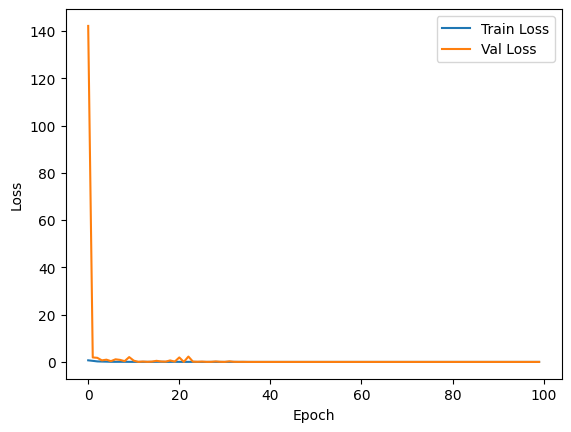

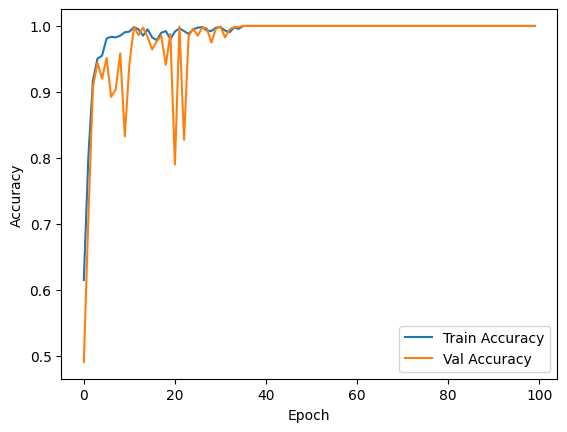

In [ ]:
train_valid(model_legacy_xception, HQ_F2F_train_loader, HQ_F2F_val_loader)

In [ ]:
accuracy, f1, precision, recall = evaluate_model(model_legacy_xception, HQ_F2F_test_loader)
print("Accuracy: {0}".format(accuracy))
print("F1 Score: {0}".format(f1))
print("Precision: {0}".format(precision))
print("Recall: {0}".format(recall))

Accuracy: 0.9583333333333334
F1 Score: 0.9581151832460733
Precision: 0.9631578947368421
Recall: 0.953125


Epoch [1/100], Train Loss: 65.5279, Train Acc: 0.6458, Val Loss: 360.1578, Val Acc: 0.5573
Epoch [2/100], Train Loss: 20.2490, Train Acc: 0.7118, Val Loss: 144.8328, Val Acc: 0.6632
Epoch [3/100], Train Loss: 17.5951, Train Acc: 0.7396, Val Loss: 78.4459, Val Acc: 0.6606
Epoch [4/100], Train Loss: 18.9445, Train Acc: 0.8038, Val Loss: 538.4348, Val Acc: 0.6302
Epoch [5/100], Train Loss: 50.5397, Train Acc: 0.7370, Val Loss: 738.1470, Val Acc: 0.5052
Epoch [6/100], Train Loss: 33.1023, Train Acc: 0.5113, Val Loss: 160.7759, Val Acc: 0.4896
Epoch [7/100], Train Loss: 31.7226, Train Acc: 0.5148, Val Loss: 14.9431, Val Acc: 0.4861
Epoch [8/100], Train Loss: 31.2794, Train Acc: 0.5122, Val Loss: 12.4579, Val Acc: 0.5425
Epoch [9/100], Train Loss: 31.3895, Train Acc: 0.5078, Val Loss: 40.1911, Val Acc: 0.5095
Epoch [10/100], Train Loss: 30.5614, Train Acc: 0.5217, Val Loss: 282.9718, Val Acc: 0.4991
Epoch [11/100], Train Loss: 35.1320, Train Acc: 0.4991, Val Loss: 18.6441, Val Acc: 0.4922
Ep

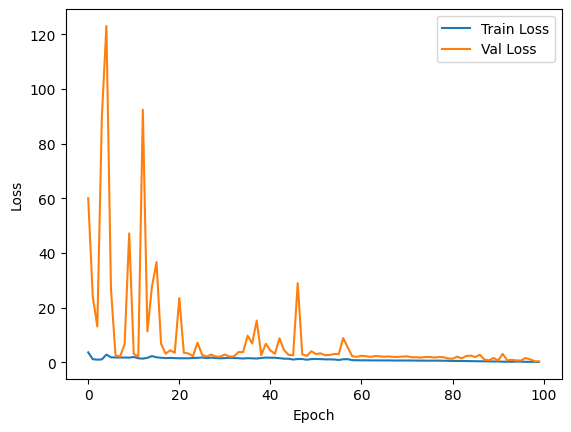

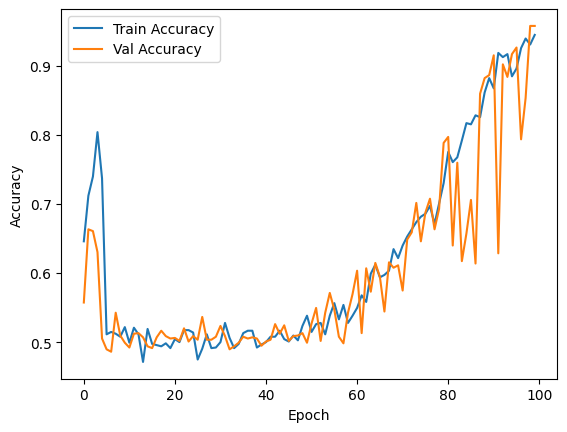

In [ ]:
train_valid(model_efficientnet_b0, HQ_F2F_train_loader, HQ_F2F_val_loader)

In [ ]:
accuracy, f1, precision, recall = evaluate_model(model_efficientnet_b0, HQ_F2F_test_loader)
print("Accuracy: {0}".format(accuracy))
print("F1 Score: {0}".format(f1))
print("Precision: {0}".format(precision))
print("Recall: {0}".format(recall))

Accuracy: 0.5026041666666666
F1 Score: 0.5188916876574308
Precision: 0.4951923076923077
Recall: 0.544973544973545


#HQ_NT

Epoch [1/100], Train Loss: 12.1584, Train Acc: 0.6137, Val Loss: 757.3661, Val Acc: 0.5017
Epoch [2/100], Train Loss: 9.5608, Train Acc: 0.7535, Val Loss: 51.6410, Val Acc: 0.7344
Epoch [3/100], Train Loss: 9.1739, Train Acc: 0.7196, Val Loss: 40.9644, Val Acc: 0.3177
Epoch [4/100], Train Loss: 7.4670, Train Acc: 0.8134, Val Loss: 16.9297, Val Acc: 0.6285
Epoch [5/100], Train Loss: 5.8738, Train Acc: 0.8611, Val Loss: 3.6885, Val Acc: 0.9089
Epoch [6/100], Train Loss: 4.5175, Train Acc: 0.8941, Val Loss: 221.8837, Val Acc: 0.5391
Epoch [7/100], Train Loss: 2.9637, Train Acc: 0.9340, Val Loss: 72.4826, Val Acc: 0.5174
Epoch [8/100], Train Loss: 2.2521, Train Acc: 0.9514, Val Loss: 11.5639, Val Acc: 0.8316
Epoch [9/100], Train Loss: 1.4151, Train Acc: 0.9731, Val Loss: 0.8591, Val Acc: 0.9835
Epoch [10/100], Train Loss: 1.7727, Train Acc: 0.9722, Val Loss: 29.8275, Val Acc: 0.6649
Epoch [11/100], Train Loss: 2.1736, Train Acc: 0.9523, Val Loss: 0.9971, Val Acc: 0.9852
Epoch [12/100], Tra

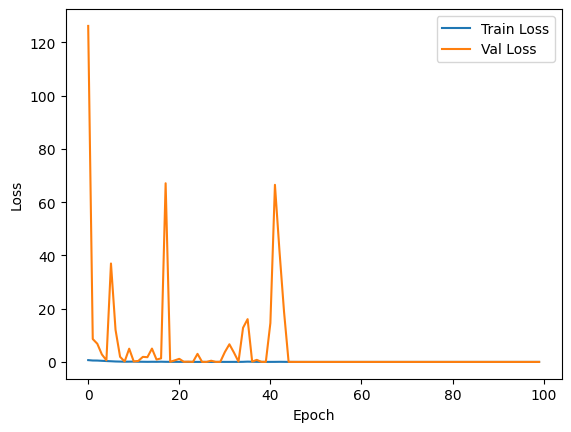

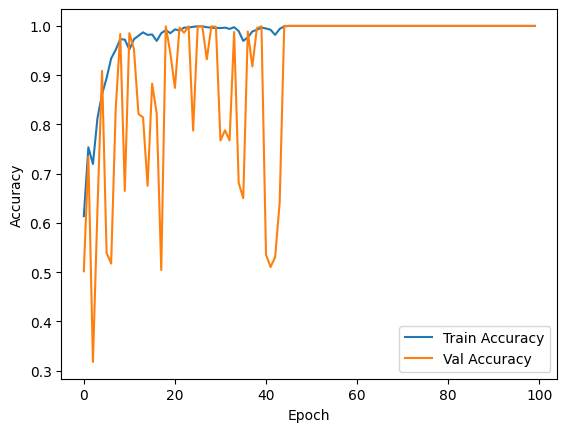

In [ ]:
train_valid(model_legacy_xception, HQ_NT_train_loader, HQ_NT_val_loader)

In [ ]:
accuracy, f1, precision, recall = evaluate_model(model_legacy_xception, HQ_NT_test_loader)
print("Accuracy: {0}".format(accuracy))
print("F1 Score: {0}".format(f1))
print("Precision: {0}".format(precision))
print("Recall: {0}".format(recall))

Accuracy: 0.921875
F1 Score: 0.9197860962566845
Precision: 0.9247311827956989
Recall: 0.9148936170212766


Epoch [1/100], Train Loss: 83.9251, Train Acc: 0.6215, Val Loss: 324.5035, Val Acc: 0.6727
Epoch [2/100], Train Loss: 29.0664, Train Acc: 0.7431, Val Loss: 15.1690, Val Acc: 0.7179
Epoch [3/100], Train Loss: 22.4769, Train Acc: 0.7587, Val Loss: 129.2361, Val Acc: 0.5156
Epoch [4/100], Train Loss: 19.7927, Train Acc: 0.7040, Val Loss: 61.8424, Val Acc: 0.7040
Epoch [5/100], Train Loss: 18.4796, Train Acc: 0.7882, Val Loss: 160.8037, Val Acc: 0.6233
Epoch [6/100], Train Loss: 15.6063, Train Acc: 0.7821, Val Loss: 13.8914, Val Acc: 0.5799
Epoch [7/100], Train Loss: 15.4742, Train Acc: 0.7422, Val Loss: 322.5807, Val Acc: 0.5877
Epoch [8/100], Train Loss: 17.2066, Train Acc: 0.7248, Val Loss: 25.7360, Val Acc: 0.6727
Epoch [9/100], Train Loss: 12.6757, Train Acc: 0.7908, Val Loss: 64.5719, Val Acc: 0.7188
Epoch [10/100], Train Loss: 20.2783, Train Acc: 0.8038, Val Loss: 93.4018, Val Acc: 0.5651
Epoch [11/100], Train Loss: 18.8518, Train Acc: 0.7622, Val Loss: 11.2379, Val Acc: 0.6328
Epoc

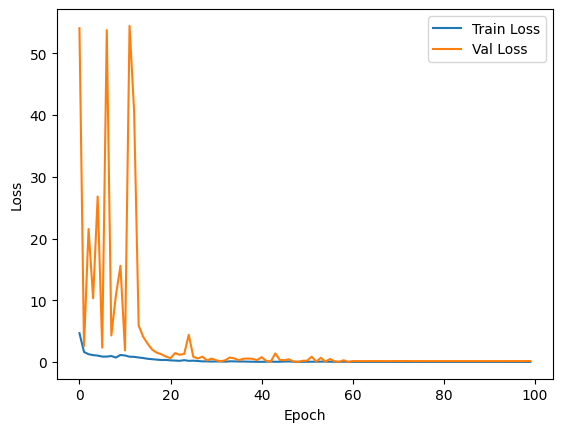

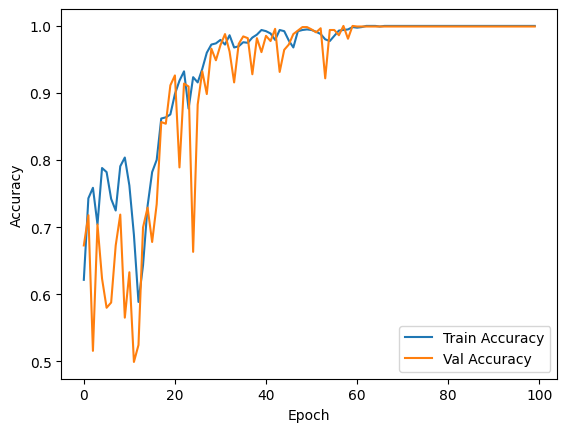

In [ ]:
train_valid(model_efficientnet_b0, HQ_NT_train_loader, HQ_NT_val_loader)

In [ ]:
accuracy, f1, precision, recall = evaluate_model(model_efficientnet_b0, HQ_NT_test_loader)
print("Accuracy: {0}".format(accuracy))
print("F1 Score: {0}".format(f1))
print("Precision: {0}".format(precision))
print("Recall: {0}".format(recall))

Accuracy: 0.8411458333333334
F1 Score: 0.8407310704960834
Precision: 0.8341968911917098
Recall: 0.8473684210526315


#LQ_F2F

Epoch [1/100], Train Loss: 7.0537, Train Acc: 0.8151, Val Loss: 539.9964, Val Acc: 0.5616
Epoch [2/100], Train Loss: 3.1436, Train Acc: 0.9314, Val Loss: 62.6709, Val Acc: 0.8160
Epoch [3/100], Train Loss: 2.4134, Train Acc: 0.9575, Val Loss: 14.5895, Val Acc: 0.5903
Epoch [4/100], Train Loss: 1.3126, Train Acc: 0.9748, Val Loss: 7.3923, Val Acc: 0.8854
Epoch [5/100], Train Loss: 0.6984, Train Acc: 0.9852, Val Loss: 6.1086, Val Acc: 0.8394
Epoch [6/100], Train Loss: 1.2888, Train Acc: 0.9731, Val Loss: 0.4048, Val Acc: 0.9931
Epoch [7/100], Train Loss: 0.3246, Train Acc: 0.9939, Val Loss: 1.2605, Val Acc: 0.9714
Epoch [8/100], Train Loss: 1.2389, Train Acc: 0.9809, Val Loss: 26.8946, Val Acc: 0.8030
Epoch [9/100], Train Loss: 0.7501, Train Acc: 0.9870, Val Loss: 0.1709, Val Acc: 0.9991
Epoch [10/100], Train Loss: 1.0311, Train Acc: 0.9835, Val Loss: 19.1925, Val Acc: 0.6806
Epoch [11/100], Train Loss: 0.6885, Train Acc: 0.9870, Val Loss: 0.1132, Val Acc: 0.9983
Epoch [12/100], Train Lo

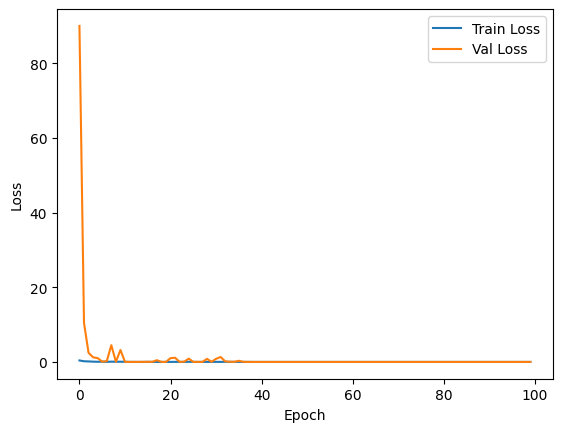

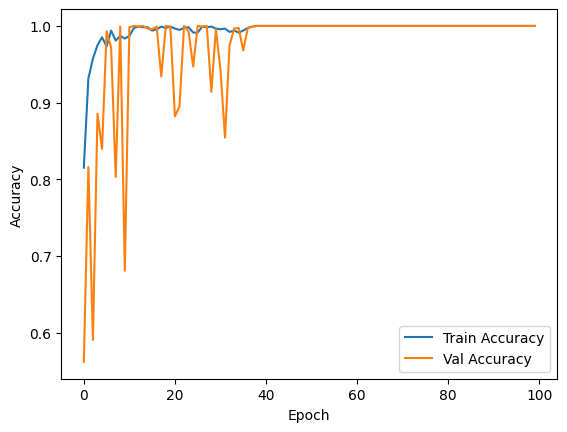

In [ ]:
train_valid(model_legacy_xception, LQ_F2F_train_loader, LQ_F2F_val_loader)

In [ ]:
accuracy, f1, precision, recall = evaluate_model(model_legacy_xception, LQ_F2F_test_loader)
print("Accuracy: {0}".format(accuracy))
print("F1 Score: {0}".format(f1))
print("Precision: {0}".format(precision))
print("Recall: {0}".format(recall))

Accuracy: 0.9895833333333334
F1 Score: 0.9895287958115183
Precision: 0.984375
Recall: 0.9947368421052631


Epoch [1/100], Train Loss: 35.6163, Train Acc: 0.7977, Val Loss: 395.1765, Val Acc: 0.6450
Epoch [2/100], Train Loss: 5.2292, Train Acc: 0.9045, Val Loss: 123.2068, Val Acc: 0.8160
Epoch [3/100], Train Loss: 2.7205, Train Acc: 0.9540, Val Loss: 1.5857, Val Acc: 0.9861
Epoch [4/100], Train Loss: 0.7332, Train Acc: 0.9870, Val Loss: 0.7042, Val Acc: 0.9861
Epoch [5/100], Train Loss: 0.4872, Train Acc: 0.9913, Val Loss: 0.4922, Val Acc: 0.9913
Epoch [6/100], Train Loss: 0.4491, Train Acc: 0.9887, Val Loss: 0.3721, Val Acc: 0.9905
Epoch [7/100], Train Loss: 0.2977, Train Acc: 0.9922, Val Loss: 0.5590, Val Acc: 0.9870
Epoch [8/100], Train Loss: 0.0658, Train Acc: 0.9991, Val Loss: 0.0475, Val Acc: 1.0000
Epoch [9/100], Train Loss: 0.0383, Train Acc: 1.0000, Val Loss: 0.0089, Val Acc: 1.0000
Epoch [10/100], Train Loss: 0.1628, Train Acc: 0.9974, Val Loss: 0.9043, Val Acc: 0.9861
Epoch [11/100], Train Loss: 1.2209, Train Acc: 0.9948, Val Loss: 0.1780, Val Acc: 0.9965
Epoch [12/100], Train Los

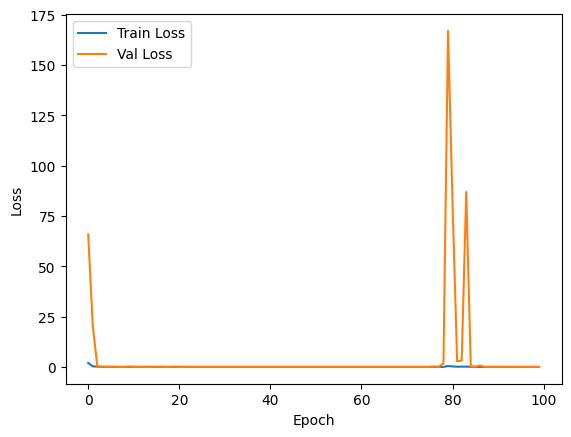

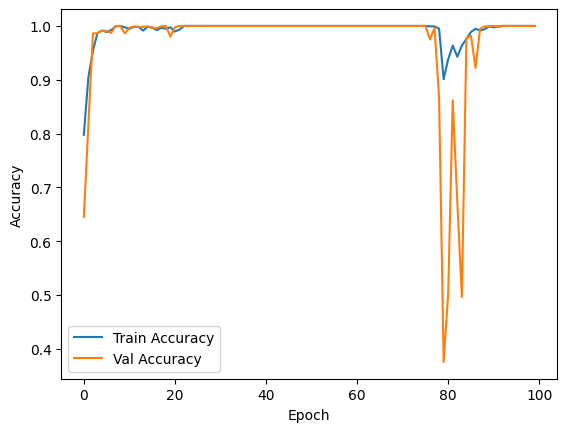

In [ ]:
train_valid(model_efficientnet_b0, LQ_F2F_train_loader, LQ_F2F_val_loader)

In [ ]:
accuracy, f1, precision, recall = evaluate_model(model_efficientnet_b0, LQ_F2F_test_loader)
print("Accuracy: {0}".format(accuracy))
print("F1 Score: {0}".format(f1))
print("Precision: {0}".format(precision))
print("Recall: {0}".format(recall))

Accuracy: 0.9817708333333334
F1 Score: 0.9818181818181819
Precision: 0.9692307692307692
Recall: 0.9947368421052631


#LQ_NT

Epoch [1/100], Train Loss: 7.1742, Train Acc: 0.8342, Val Loss: 744.5034, Val Acc: 0.5095
Epoch [2/100], Train Loss: 3.9611, Train Acc: 0.9115, Val Loss: 7.2402, Val Acc: 0.8550
Epoch [3/100], Train Loss: 1.6201, Train Acc: 0.9661, Val Loss: 4.5189, Val Acc: 0.9184
Epoch [4/100], Train Loss: 2.0436, Train Acc: 0.9627, Val Loss: 6.9343, Val Acc: 0.8403
Epoch [5/100], Train Loss: 1.9044, Train Acc: 0.9670, Val Loss: 10.3154, Val Acc: 0.7865
Epoch [6/100], Train Loss: 1.1369, Train Acc: 0.9757, Val Loss: 12.5124, Val Acc: 0.7760
Epoch [7/100], Train Loss: 0.5571, Train Acc: 0.9870, Val Loss: 0.3713, Val Acc: 0.9939
Epoch [8/100], Train Loss: 0.3639, Train Acc: 0.9931, Val Loss: 2.9409, Val Acc: 0.9505
Epoch [9/100], Train Loss: 0.3956, Train Acc: 0.9896, Val Loss: 0.8753, Val Acc: 0.9852
Epoch [10/100], Train Loss: 1.0596, Train Acc: 0.9809, Val Loss: 8.3900, Val Acc: 0.8524
Epoch [11/100], Train Loss: 0.2248, Train Acc: 0.9974, Val Loss: 2.2850, Val Acc: 0.9514
Epoch [12/100], Train Loss

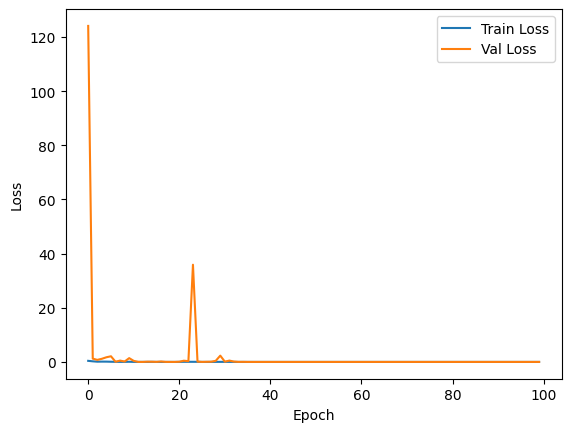

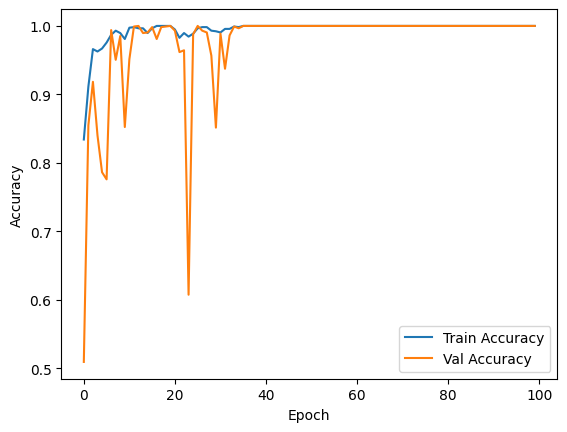

In [14]:
train_valid(model_legacy_xception, LQ_NT_train_loader, LQ_NT_val_loader)

In [15]:
accuracy, f1, precision, recall = evaluate_model(model_legacy_xception, LQ_NT_test_loader)
print("Accuracy: {0}".format(accuracy))
print("F1 Score: {0}".format(f1))
print("Precision: {0}".format(precision))
print("Recall: {0}".format(recall))

Accuracy: 0.9895833333333334
F1 Score: 0.9897959183673469
Precision: 0.9847715736040609
Recall: 0.9948717948717949


Epoch [1/100], Train Loss: 29.5239, Train Acc: 0.8151, Val Loss: 276.2091, Val Acc: 0.8220
Epoch [2/100], Train Loss: 4.0707, Train Acc: 0.9297, Val Loss: 59.5949, Val Acc: 0.8828
Epoch [3/100], Train Loss: 2.0938, Train Acc: 0.9470, Val Loss: 1.4413, Val Acc: 0.9818
Epoch [4/100], Train Loss: 1.1338, Train Acc: 0.9740, Val Loss: 0.3315, Val Acc: 0.9965
Epoch [5/100], Train Loss: 0.5127, Train Acc: 0.9905, Val Loss: 0.1160, Val Acc: 0.9983
Epoch [6/100], Train Loss: 0.2124, Train Acc: 0.9957, Val Loss: 0.0437, Val Acc: 0.9991
Epoch [7/100], Train Loss: 0.0783, Train Acc: 0.9991, Val Loss: 0.0278, Val Acc: 1.0000
Epoch [8/100], Train Loss: 0.3619, Train Acc: 0.9913, Val Loss: 0.1365, Val Acc: 0.9974
Epoch [9/100], Train Loss: 0.3181, Train Acc: 0.9939, Val Loss: 0.1206, Val Acc: 0.9957
Epoch [10/100], Train Loss: 0.2507, Train Acc: 0.9939, Val Loss: 0.1914, Val Acc: 0.9957
Epoch [11/100], Train Loss: 0.5453, Train Acc: 0.9905, Val Loss: 0.3112, Val Acc: 0.9939
Epoch [12/100], Train Loss

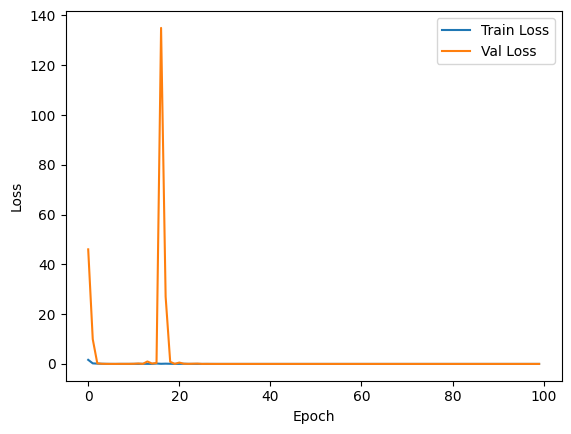

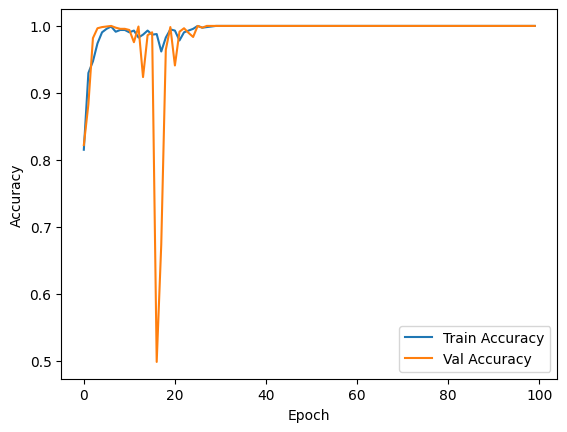

In [16]:
train_valid(model_efficientnet_b0, LQ_NT_train_loader, LQ_NT_val_loader)

In [17]:
accuracy, f1, precision, recall = evaluate_model(model_efficientnet_b0, LQ_NT_test_loader)
print("Accuracy: {0}".format(accuracy))
print("F1 Score: {0}".format(f1))
print("Precision: {0}".format(precision))
print("Recall: {0}".format(recall))

Accuracy: 0.9973958333333334
F1 Score: 0.9973753280839895
Precision: 0.9947643979057592
Recall: 1.0
